In [128]:
import pandas as pd
import numpy as np
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

In [86]:
shutil.unpack_archive('titanic.zip')

In [100]:
train=pd.read_csv('train.csv', index_col='PassengerId')
test=pd.read_csv('test.csv', index_col='PassengerId')
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [139]:
df=train.drop('Name', axis=1)
df1=test.drop('Name', axis=1)

In [140]:
df=df.fillna(method='bfill').fillna(method='ffill')
df1=df1.fillna(method='bfill').fillna(method='ffill')

In [141]:
df[['Sex','Ticket',"Cabin",'Embarked']]=df[['Sex','Ticket',"Cabin",'Embarked']].apply(LabelEncoder().fit_transform)
df1[['Sex','Ticket',"Cabin",'Embarked']]=df1[['Sex','Ticket',"Cabin",'Embarked']].apply(LabelEncoder().fit_transform)

In [142]:
df['Fare']=df['Fare'].round(1)
df1['Fare']=df1['Fare'].round(1)

In [114]:
df.corrwith(df['Survived']).abs().sort_values(ascending=False)

Survived    1.000000
Sex         0.543351
Pclass      0.338481
Fare        0.257322
Embarked    0.170943
Ticket      0.164549
Parch       0.081629
Age         0.055505
SibSp       0.035322
Cabin       0.009485
dtype: float64

In [143]:
df1

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,152,7.8,12,1
893,3,0,47.0,1,0,221,7.0,12,2
894,2,1,62.0,0,0,73,9.7,12,1
895,3,1,27.0,0,0,147,8.7,12,2
896,3,0,22.0,1,1,138,12.3,12,2
...,...,...,...,...,...,...,...,...,...
1305,3,1,39.0,0,0,267,8.0,22,2
1306,1,0,39.0,0,0,324,108.9,22,0
1307,3,1,38.5,0,0,346,7.2,22,2


In [115]:
X=df.drop('Survived', axis=1)
y=df['Survived']

In [178]:
X_scaled=pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)
test_scaled=pd.DataFrame(StandardScaler().fit_transform(df1), columns=X.columns, index=df1.index)
test_scaled

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,0.873482,0.755929,0.318919,-0.499470,-0.400248,-0.269494,-0.497876,-1.054612,-0.470915
893,0.873482,-1.322876,1.198064,0.616992,-0.400248,0.372934,-0.512216,-1.054612,0.700767
894,-0.315819,0.755929,2.253039,-0.499470,-0.400248,-1.005027,-0.463817,-1.054612,-0.470915
895,0.873482,0.755929,-0.208569,-0.499470,-0.400248,-0.316046,-0.481743,-1.054612,0.700767
896,0.873482,-1.322876,-0.560227,0.616992,0.619896,-0.399841,-0.417211,-1.054612,0.700767
...,...,...,...,...,...,...,...,...,...
1305,0.873482,0.755929,0.635411,-0.499470,-0.400248,0.801219,-0.494290,-0.581468,0.700767
1306,-1.505120,-1.322876,0.635411,-0.499470,-0.400248,1.331921,1.314381,-0.581468,-1.642598
1307,0.873482,0.755929,0.600245,-0.499470,-0.400248,1.536753,-0.508631,-0.581468,0.700767


In [123]:
X_train, X_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Classification report:               precision    recall  f1-score   support

           0       0.79      0.71      0.75       105
           1       0.64      0.73      0.68        74

    accuracy                           0.72       179
   macro avg       0.72      0.72      0.72       179
weighted avg       0.73      0.72      0.72       179

Accuracy Score: 0.7206703910614525


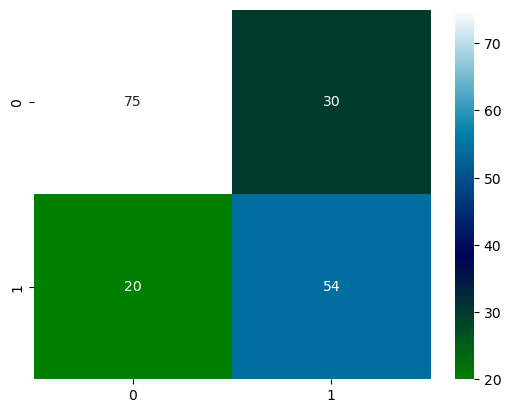

In [131]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predict=tree_model.predict(X_test)
print("Classification report:", classification_report(y_test, tree_predict))
print("Accuracy Score:",accuracy_score(y_test, tree_predict))

tree_matrix=confusion_matrix(y_test, tree_predict)
sns.heatmap(tree_matrix, annot=True, cmap='ocean')
plt.show()

Classification report:               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.77      0.69      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy Score: 0.7877094972067039


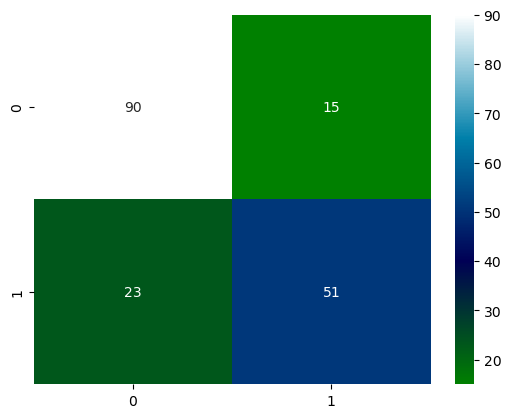

In [132]:
forest_model=RandomForestClassifier(n_estimators=5)
forest_model.fit(X_train, y_train)
forest_predict=forest_model.predict(X_test)

print("Classification report:", classification_report(y_test, forest_predict))
print("Accuracy Score:", accuracy_score(y_test, forest_predict))

forest_matrix=confusion_matrix(y_test, forest_predict)
sns.heatmap(forest_matrix, annot=True, cmap='ocean')
plt.show()

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Accuracy Score: 0.8044692737430168


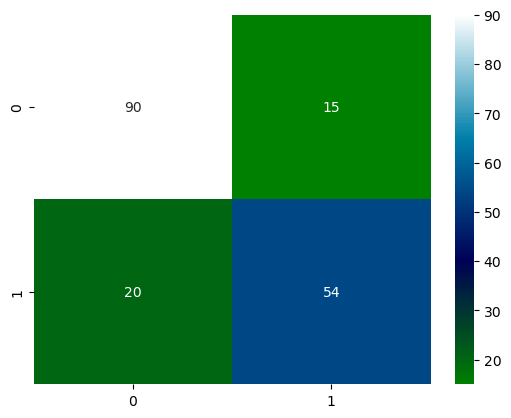

In [134]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
log_predict=log_model.predict(X_test)

print("Classification Report:", classification_report(y_test, log_predict))
print("Accuracy Score:", accuracy_score(y_test, log_predict))

log_matrix=confusion_matrix(y_test, log_predict)
sns.heatmap(log_matrix, annot=True, cmap='ocean')
plt.show()

Classification Report               precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy Score: 0.8044692737430168


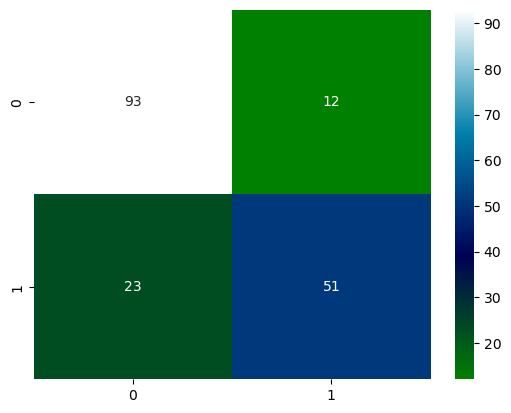

In [135]:
svc_model=SVC()
svc_model.fit(X_train, y_train)
svc_predict=svc_model.predict(X_test)

print("Classification Report", classification_report(y_test, svc_predict))
print("Accuracy Score:", accuracy_score(y_test, svc_predict))

svc_matrix=confusion_matrix(y_test, svc_predict)
sns.heatmap(svc_matrix, annot=True, cmap='ocean')
plt.show()

D:\.anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Classification Report               precision    recall  f1-score   support

           0       0.77      0.83      0.80       105
           1       0.73      0.65      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179

Accuracy Score: 0.7541899441340782


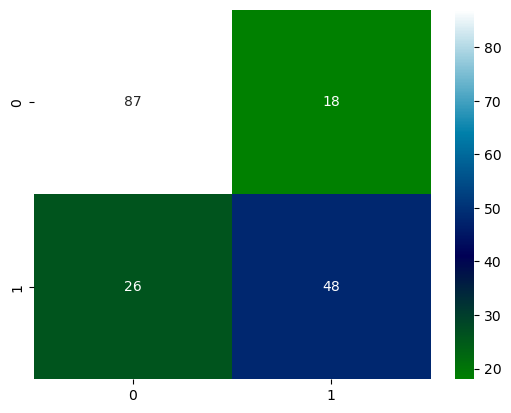

In [136]:
knn_model=KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predict=knn_model.predict(X_test)

print("Classification Report", classification_report(y_test, knn_predict))
print("Accuracy Score:", accuracy_score(y_test, knn_predict))

svc_matrix=confusion_matrix(y_test, knn_predict)
sns.heatmap(svc_matrix, annot=True, cmap='ocean')
plt.show()

In [151]:
test_predict=log_model.predict(test_scaled)
test_data=pd.DataFrame(test_predict, index=test_scaled.index)

In [206]:
gender=pd.read_csv('gender_submission.csv')
gender['Survived']=test_predict

In [207]:
gender.to_csv('titanic_sub.csv', index=False)

In [208]:
gender['Survived'].value_counts()

0    271
1    147
Name: Survived, dtype: int64

In [209]:
submi=svc_model.predict(test_scaled)
gender['Survived']=submi

In [212]:
gender['Survived'].value_counts()
gender.to_csv("gender_submission.csv", index=False)